In [1]:
# Housekeeping imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## Notebook 3: Working with Images

In machine learning and computer vision, images are represented as **NumPy arrays**.

An image is typically a 3D array with shape:
(height, width, colour_channels)

Each value represents the intensity of a colour channel at a pixel.


### 3.1 Creating Sample Images

We create simple RGB images using NumPy to demonstrate that images are just arrays.

In [2]:
# Create a simple RGB image using NumPy
# Shape: (height, width, colour channels)
# dtype uint8 means pixel values range from 0–255

# Red gradient image
red_image = np.zeros((200, 200, 3), dtype=np.uint8)
for i in range(200):
    red_image[:, i] = [i, 0, 0]  # RGB format

# Blue gradient image
blue_image = np.zeros((200, 200, 3), dtype=np.uint8)
for i in range(200):
    blue_image[i, :] = [0, 0, i]

# Save images using PIL
Image.fromarray(red_image).save('red_gradient.png')
Image.fromarray(blue_image).save('blue_gradient.png')

print("Created sample images: red_gradient.png and blue_gradient.png")
print(f"Red image shape: {red_image.shape}")
print(f"Data type: {red_image.dtype}")
print(f"Value range: [{red_image.min()}, {red_image.max()}]")

Created sample images: red_gradient.png and blue_gradient.png
Red image shape: (200, 200, 3)
Data type: uint8
Value range: [0, 199]


Key observations:
- Images are NumPy arrays
- Shape = (height, width, channels)
- Pixel values range from 0 to 255

### 3.2 Loading and Displaying Images

Different libraries handle colour channels differently.

- **PIL / Matplotlib** use RGB (Red, Green, Blue)
- **OpenCV** uses BGR (Blue, Green, Red)

If this is not handled correctly, images will display with incorrect colours.

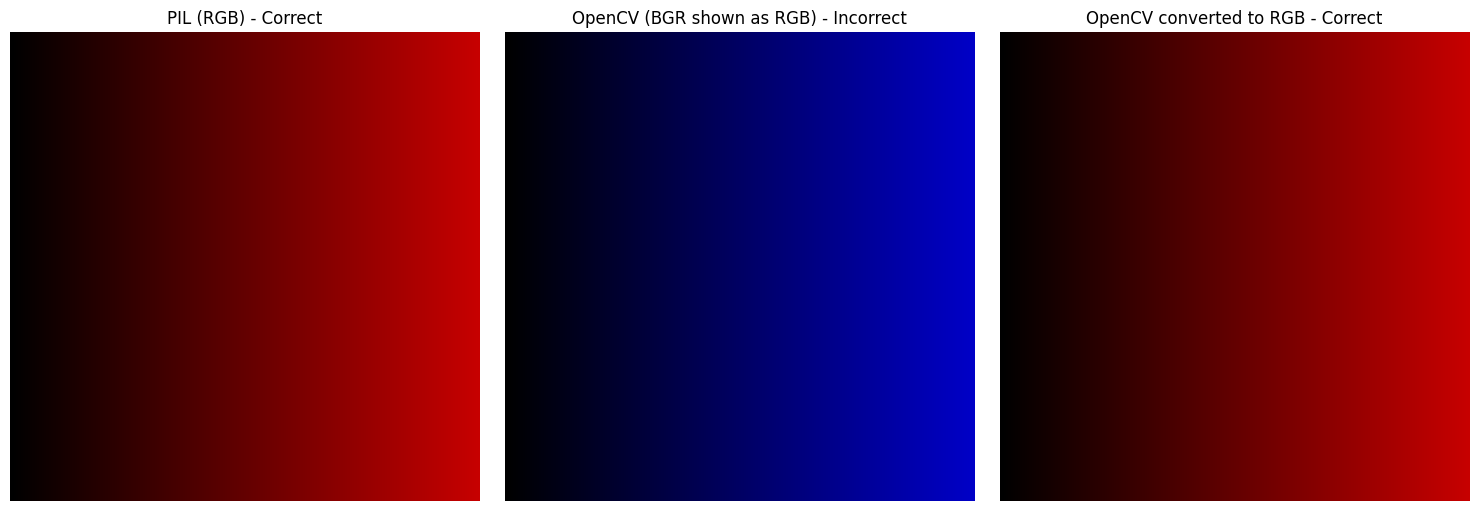

Always convert OpenCV images before displaying:
cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [3]:
# Load image using PIL (RGB)
pil_image = Image.open('red_gradient.png')
pil_array = np.array(pil_image)

# Load the same image using OpenCV (BGR)
cv_image = cv2.imread('red_gradient.png')

# Display side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(pil_array)
axes[0].set_title('PIL (RGB) - Correct')
axes[0].axis('off')

axes[1].imshow(cv_image)
axes[1].set_title('OpenCV (BGR shown as RGB) - Incorrect')
axes[1].axis('off')

# Convert BGR to RGB for correct display
cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)

axes[2].imshow(cv_image_rgb)
axes[2].set_title('OpenCV converted to RGB - Correct')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Always convert OpenCV images before displaying:")
print("cv2.cvtColor(image, cv2.COLOR_BGR2RGB)")

Takeaway:
If an image looks “wrong”, check the colour format before doing anything else.

## Exercise, fix the colour space

Now try with the image 353.jpg

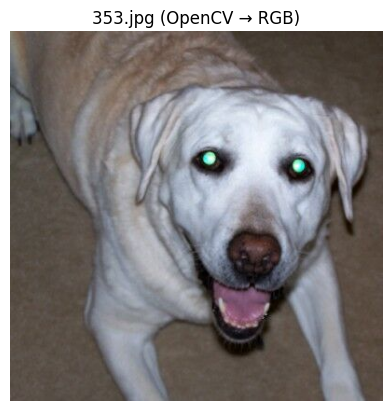

In [5]:
# Load image using OpenCV (BGR format)
exercise_image = cv2.imread('353.jpg')

# Convert from BGR to RGB
exercise_image_rgb = cv2.cvtColor(exercise_image, cv2.COLOR_BGR2RGB)

# Display correctly using matplotlib
plt.imshow(exercise_image_rgb)
plt.title('353.jpg (OpenCV → RGB)')
plt.axis('off')
plt.show()


### 3.3 Images as NumPy Arrays

An image is a NumPy array.

For an RGB image:
- Shape = (height, width, 3)
- Each pixel contains 3 values: [Red, Green, Blue]
- Each channel can be accessed independently

This representation is what machine learning models actually work with.

In [6]:
# Examine image properties
print("Image properties:")
print(f"Shape: {pil_array.shape}")      # (height, width, channels)
print(f"Data type: {pil_array.dtype}")  # typically uint8
print(f"Number of pixels: {pil_array.shape[0] * pil_array.shape[1]}")
print(f"Total elements: {pil_array.size}")

Image properties:
Shape: (200, 200, 3)
Data type: uint8
Number of pixels: 40000
Total elements: 120000


Note:
- Number of pixels = height × width
- Total elements = height × width × channels

In [7]:
# Access individual pixels
print(f"Top-left pixel (RGB): {pil_array[0, 0]}")
print(f"Top-right pixel (RGB): {pil_array[0, -1]}")

# Access colour channels
print(f"Red channel shape: {pil_array[:, :, 0].shape}")
print(f"Green channel shape: {pil_array[:, :, 1].shape}")
print(f"Blue channel shape: {pil_array[:, :, 2].shape}")

Top-left pixel (RGB): [0 0 0]
Top-right pixel (RGB): [199   0   0]
Red channel shape: (200, 200)
Green channel shape: (200, 200)
Blue channel shape: (200, 200)


Key idea:
- `array[y, x]` gives a pixel
- `array[:, :, channel]` gives a colour channel

In [8]:
pil_array

array([[[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]]

### Visualising Colour Channels

Each colour channel represents the intensity of that colour across the image.
Visualising channels separately helps understand how images are composed.

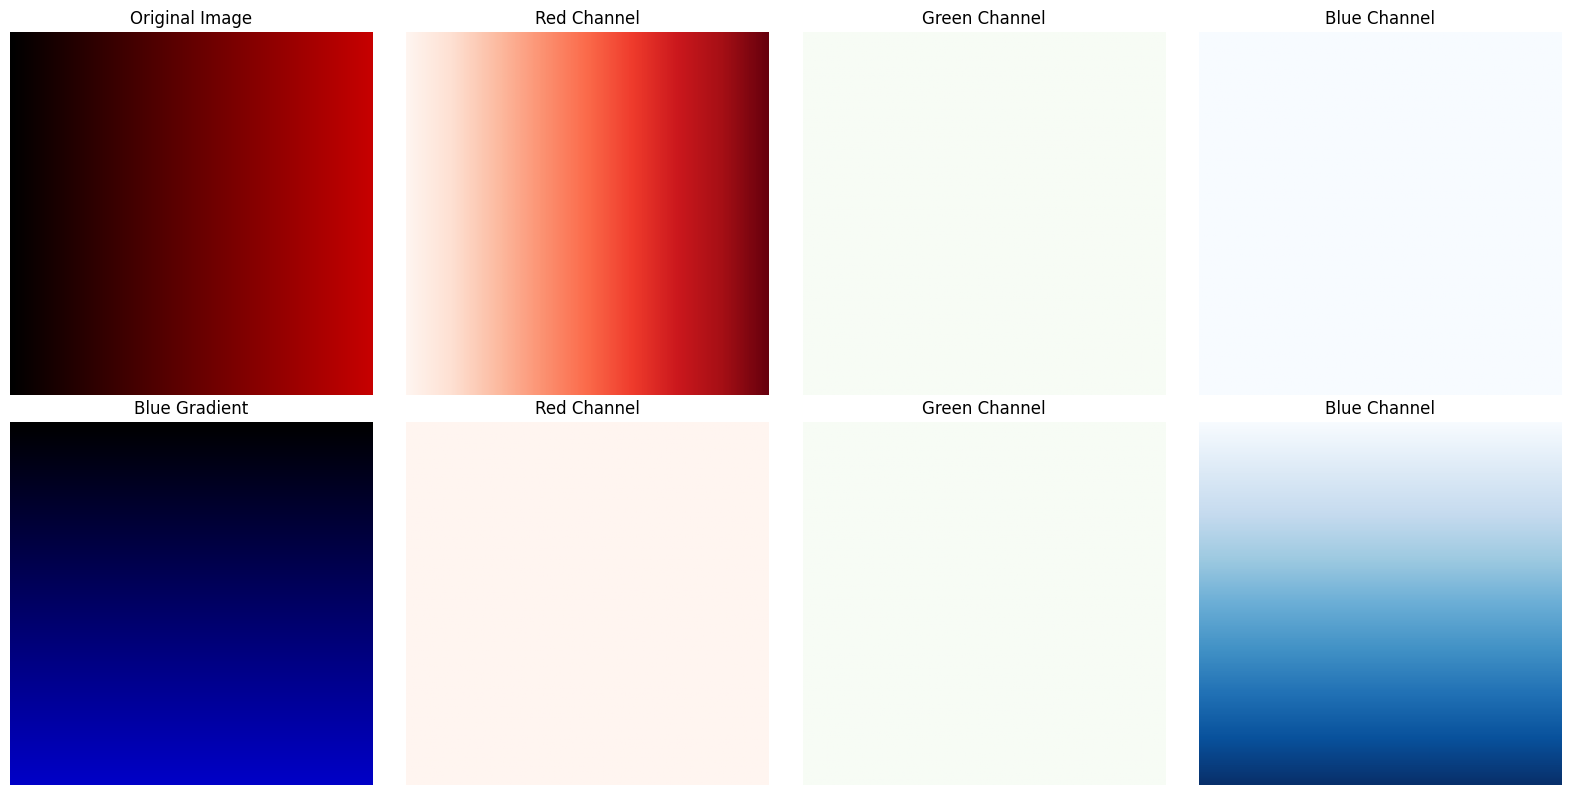

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original image
axes[0, 0].imshow(pil_array)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Red channel
axes[0, 1].imshow(pil_array[:, :, 0], cmap='Reds')
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

# Green channel
axes[0, 2].imshow(pil_array[:, :, 1], cmap='Greens')
axes[0, 2].set_title('Green Channel')
axes[0, 2].axis('off')

# Blue channel
axes[0, 3].imshow(pil_array[:, :, 2], cmap='Blues')
axes[0, 3].set_title('Blue Channel')
axes[0, 3].axis('off')

# Load blue gradient image
blue_array = np.array(Image.open('blue_gradient.png'))

axes[1, 0].imshow(blue_array)
axes[1, 0].set_title('Blue Gradient')
axes[1, 0].axis('off')

axes[1, 1].imshow(blue_array[:, :, 0], cmap='Reds')
axes[1, 1].set_title('Red Channel')
axes[1, 1].axis('off')

axes[1, 2].imshow(blue_array[:, :, 1], cmap='Greens')
axes[1, 2].set_title('Green Channel')
axes[1, 2].axis('off')

axes[1, 3].imshow(blue_array[:, :, 2], cmap='Blues')
axes[1, 3].set_title('Blue Channel')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

Takeaways:
- Images are arrays of numbers
- Colour images have three channels
- Channels can be separated and visualised independently
- Machine learning models operate on these numerical representations

## Exercise Pixel Exploration & Channel Manipulation

Value at (100, 100): [100   0   0]
Max red value: 199


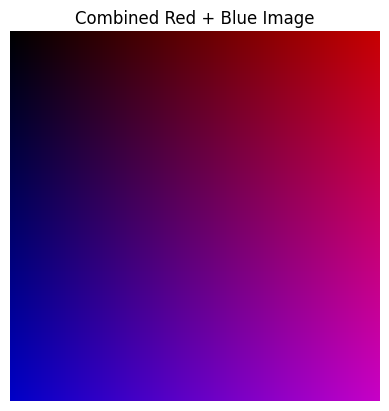

In [15]:
# 1. Access and print the pixel values at position (100, 100) in red_gradient.png
# 2. What do you expect the RGB values to be? Check if you're right!
# 3. Extract just the red channel and find its maximum value
# Your code here:
red_array = np.array(Image.open('red_gradient.png'))
pixel_value = red_array[100, 100]
print("Value at (100, 100):", pixel_value)

red_channel = red_array[:, :, 0]
print("Max red value:", red_channel.max())

# Create a new image where:
# - Red channel comes from red_gradient.png
# - Blue channel comes from blue_gradient.png
# - Green channel is all zeros
# Display the result - what colour do you expect?
# Your code here:
red_array2 = np.array(Image.open('red_gradient.png'))
blue_array2 = np.array(Image.open('blue_gradient.png'))

red_channel2 = red_array2[:, :, 0]
blue_channel2 = blue_array2[:, :, 2]

green_channel = np.zeros_like(red_channel)

combined_image = np.stack(
    (red_channel2, green_channel, blue_channel2),
    axis=2
)

plt.imshow(combined_image)
plt.title("Combined Red + Blue Image")
plt.axis('off')
plt.show()

### 3.4 Normalisation: Converting from [0, 255] to [0, 1]

Pixel values in images usually range from 0–255.
Most machine learning models expect input values scaled to a smaller range,
commonly [0, 1].

Normalisation improves numerical stability and training behaviour.

In [17]:
# Step 1: Inspect image raw values

# Load image with pixel values in [0, 255]
img_255 = np.array(Image.open('red_gradient.png'))

print("Original image:")
print(f"Min: {img_255.min()}, Max: {img_255.max()}, Dtype: {img_255.dtype}")


Original image:
Min: 0, Max: 199, Dtype: uint8


In [18]:
# Step 2: Normalise values by dividing

# Normalise to [0, 1]
img_01 = img_255 / 255.0

print("\nAfter dividing by 255:")
print(f"Min: {img_01.min():.3f}, Max: {img_01.max():.3f}, Dtype: {img_01.dtype}")


After dividing by 255:
Min: 0.000, Max: 0.780, Dtype: float64


## Step 3: MinMaxScaler
Alternative approach:
Scikit-learn provides scalers for more general feature normalisation.
This is useful when working with non-image data or different ranges.


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Flatten image for sklearn (expects 2D: samples × features)
img_flat = img_255.reshape(-1, 3)

scaler = MinMaxScaler()
img_scaled_flat = scaler.fit_transform(img_flat)

# Reshape back to image shape
img_scaled = img_scaled_flat.reshape(img_255.shape)

print("\nUsing MinMaxScaler:")
print(f"Min: {img_scaled.min():.3f}, Max: {img_scaled.max():.3f}")


Using MinMaxScaler:
Min: 0.000, Max: 1.000


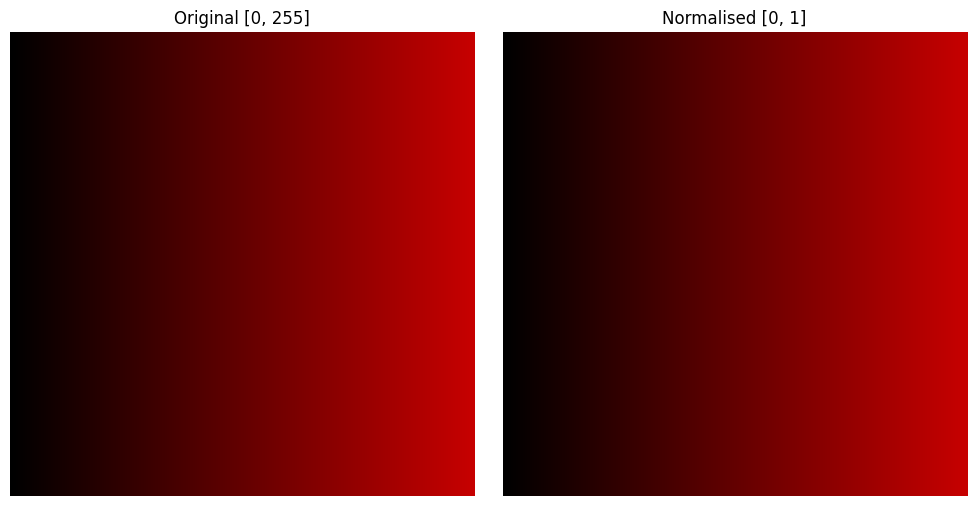

In [21]:
# Step 4: Visual Comparison

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_255)
axes[0].set_title('Original [0, 255]')
axes[0].axis('off')

axes[1].imshow(img_01)
axes[1].set_title('Normalised [0, 1]')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Note:
Both images look identical because matplotlib automatically scales values.
Machine learning models do not.

### 3.5 Image Manipulation

We generate a synthetic image to demonstrate common image transformations.
All operations below are simple NumPy array manipulations.

In [22]:
height, width = 300, 300
x, y = np.meshgrid(
    np.linspace(-2, 2, width),
    np.linspace(-2, 2, height)
)

# Create RGB channels
r = (np.sin(x) * np.cos(y) + 1) / 2
g = (np.sin(x * 2) + 1) / 2
b = (np.cos(y * 2) + 1) / 2

pattern_img = np.dstack([r, g, b])
pattern_img = (pattern_img * 255).astype(np.uint8)

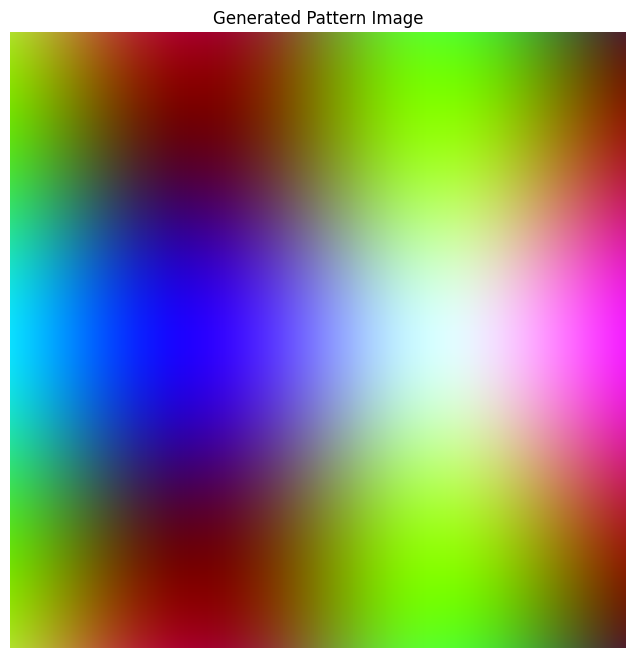

In [23]:
Image.fromarray(pattern_img).save('pattern.png')

plt.figure(figsize=(8, 8))
plt.imshow(pattern_img)
plt.title('Generated Pattern Image')
plt.axis('off')
plt.show()

Below are common image transformations used in preprocessing and data augmentation.

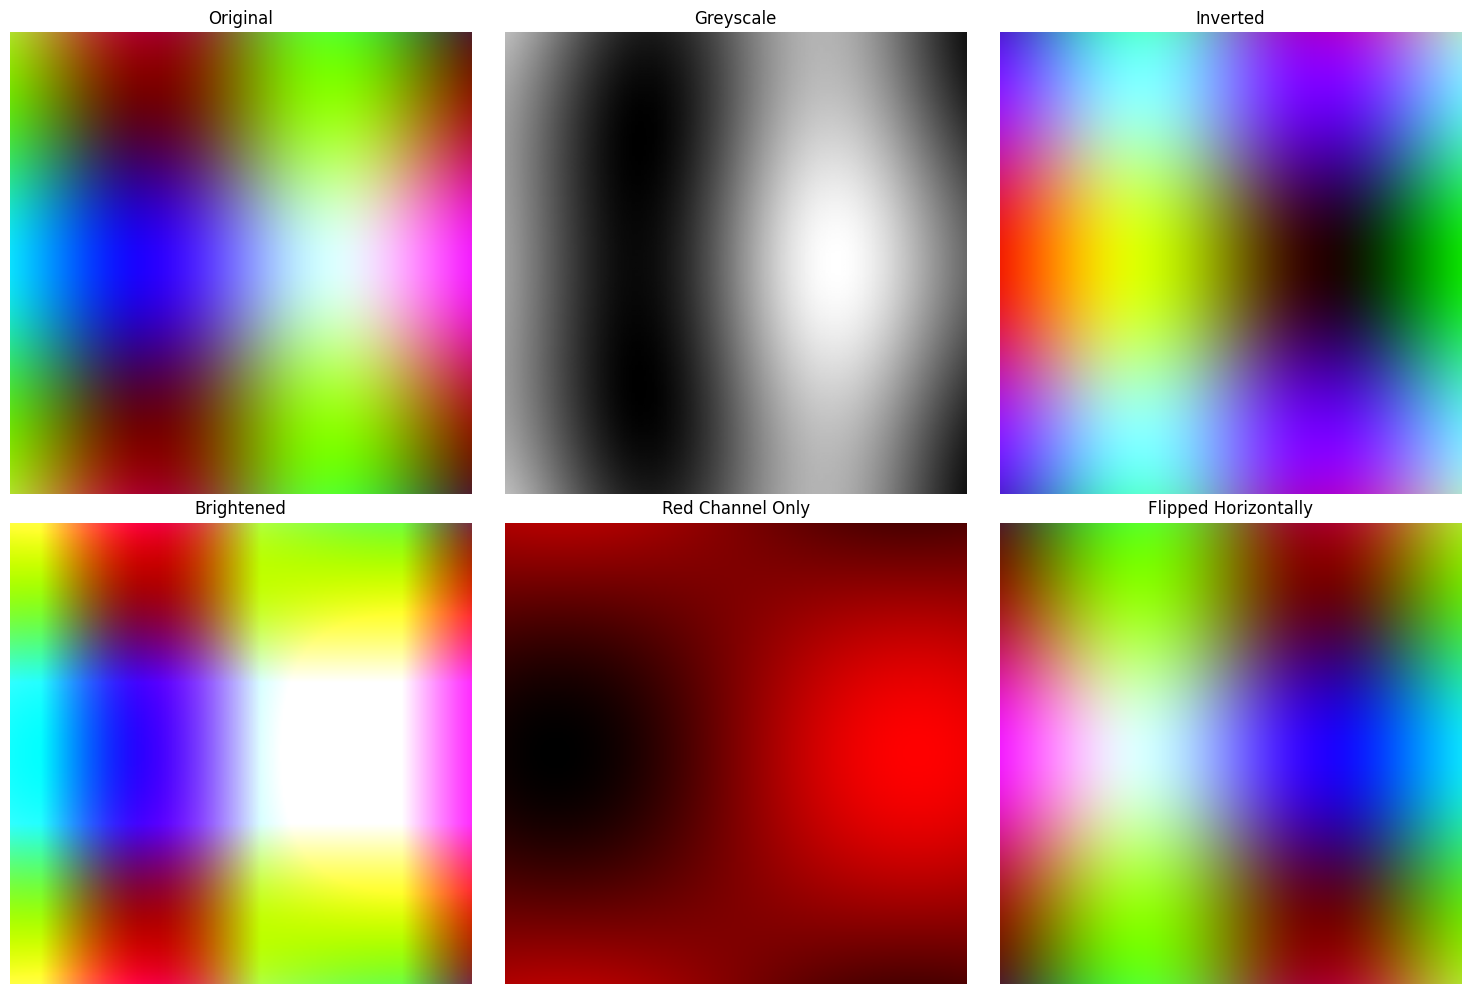

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original
axes[0, 0].imshow(pattern_img)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# Greyscale
gray = (
    0.299 * pattern_img[:, :, 0] +
    0.587 * pattern_img[:, :, 1] +
    0.114 * pattern_img[:, :, 2]
)
axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Greyscale')
axes[0, 1].axis('off')

# Inverted
inverted = 255 - pattern_img
axes[0, 2].imshow(inverted)
axes[0, 2].set_title('Inverted')
axes[0, 2].axis('off')

# Brightened
brightened = np.clip(pattern_img * 1.5, 0, 255).astype(np.uint8)
axes[1, 0].imshow(brightened)
axes[1, 0].set_title('Brightened')
axes[1, 0].axis('off')

# Red channel only
red_only = pattern_img.copy()
red_only[:, :, 1] = 0
red_only[:, :, 2] = 0
axes[1, 1].imshow(red_only)
axes[1, 1].set_title('Red Channel Only')
axes[1, 1].axis('off')

# Flipped
flipped = np.fliplr(pattern_img)
axes[1, 2].imshow(flipped)
axes[1, 2].set_title('Flipped Horizontally')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

Key takeaways:
- Normalisation rescales pixel values for ML models
- Most image preprocessing is simple NumPy arithmetic
- Transformations change data representation, not information
- These steps are common before training image-based models

## Exercises: Create Transformation

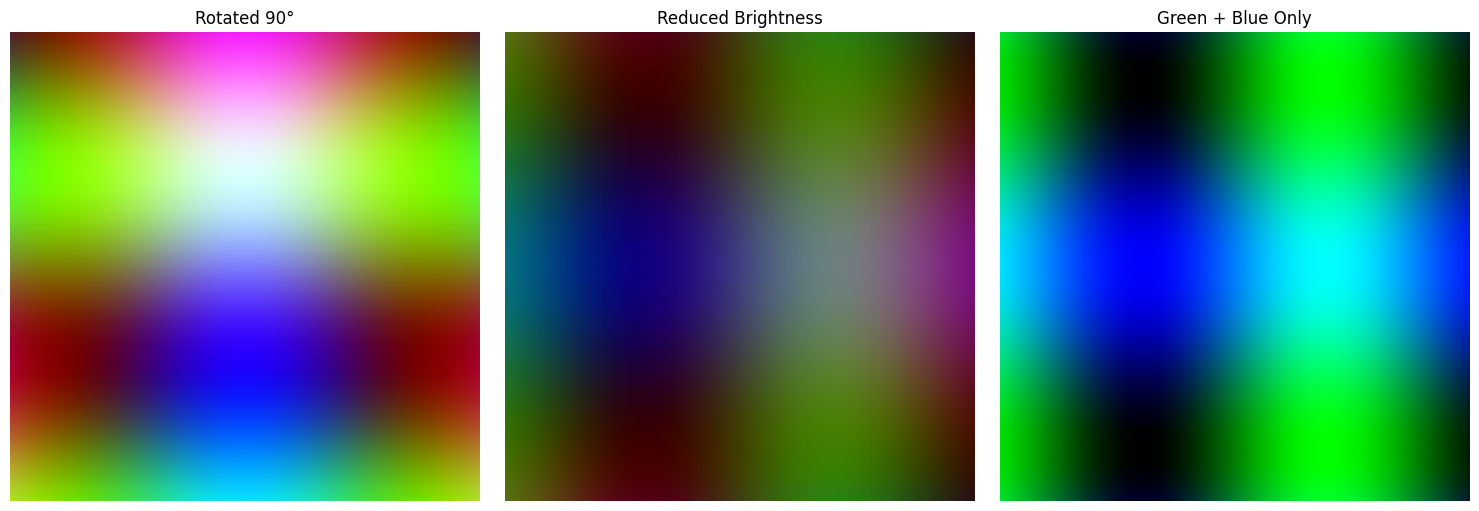

In [25]:
# Load image
pattern = np.array(Image.open('pattern.png'))

# 1. Rotate 90 degrees
rotated = np.rot90(pattern)

# 2. Reduce brightness
darkened = (pattern * 0.5).astype(np.uint8)

# 3. Remove red channel (keep green & blue)
gb_only = pattern.copy()
gb_only[:, :, 0] = 0

# Display all three
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(rotated)
axes[0].set_title('Rotated 90°')
axes[0].axis('off')

axes[1].imshow(darkened)
axes[1].set_title('Reduced Brightness')
axes[1].axis('off')

axes[2].imshow(gb_only)
axes[2].set_title('Green + Blue Only')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Exercises: Create A Filter

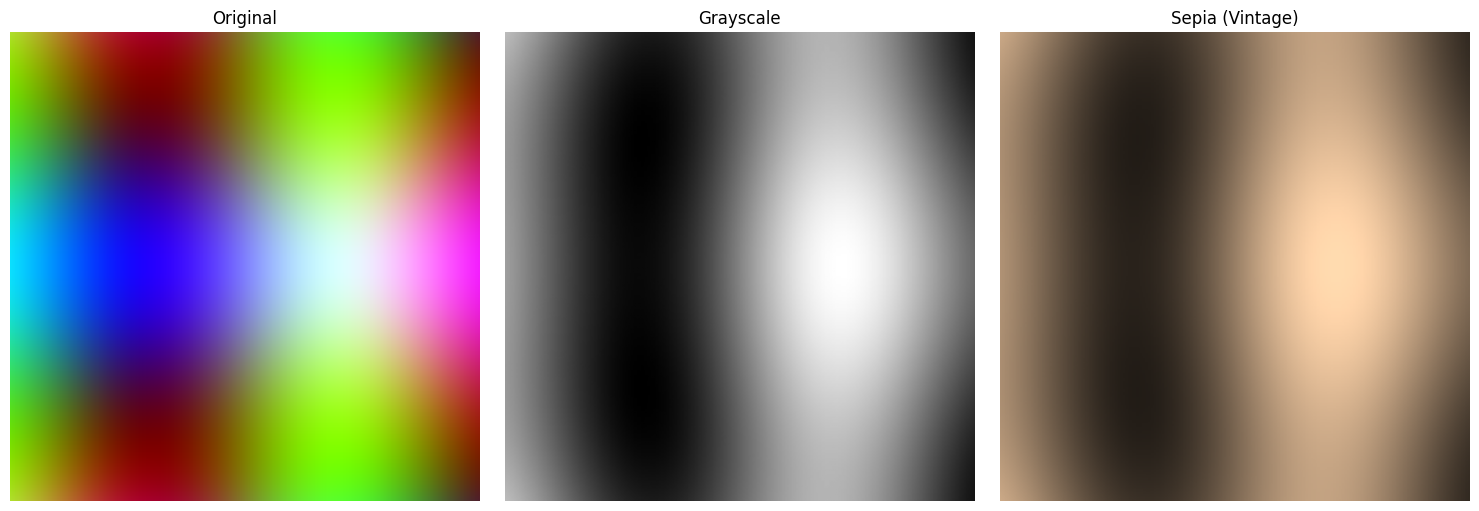

In [26]:
# Load image
pattern = np.array(Image.open('pattern.png'))

# 1. Convert to grayscale (luminosity method)
gray = (
    0.299 * pattern[:, :, 0] +
    0.587 * pattern[:, :, 1] +
    0.114 * pattern[:, :, 2]
)

# 2. Create sepia image
sepia = np.zeros_like(pattern, dtype=float)
sepia[:, :, 0] = gray * 1.2  # Red
sepia[:, :, 1] = gray * 1.0  # Green
sepia[:, :, 2] = gray * 0.8  # Blue

# 3. Reduce brightness
sepia = np.clip(sepia * 0.9, 0, 255).astype(np.uint8)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(pattern)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

axes[2].imshow(sepia)
axes[2].set_title('Sepia (Vintage)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


## Exercises: Apply To Dog Image

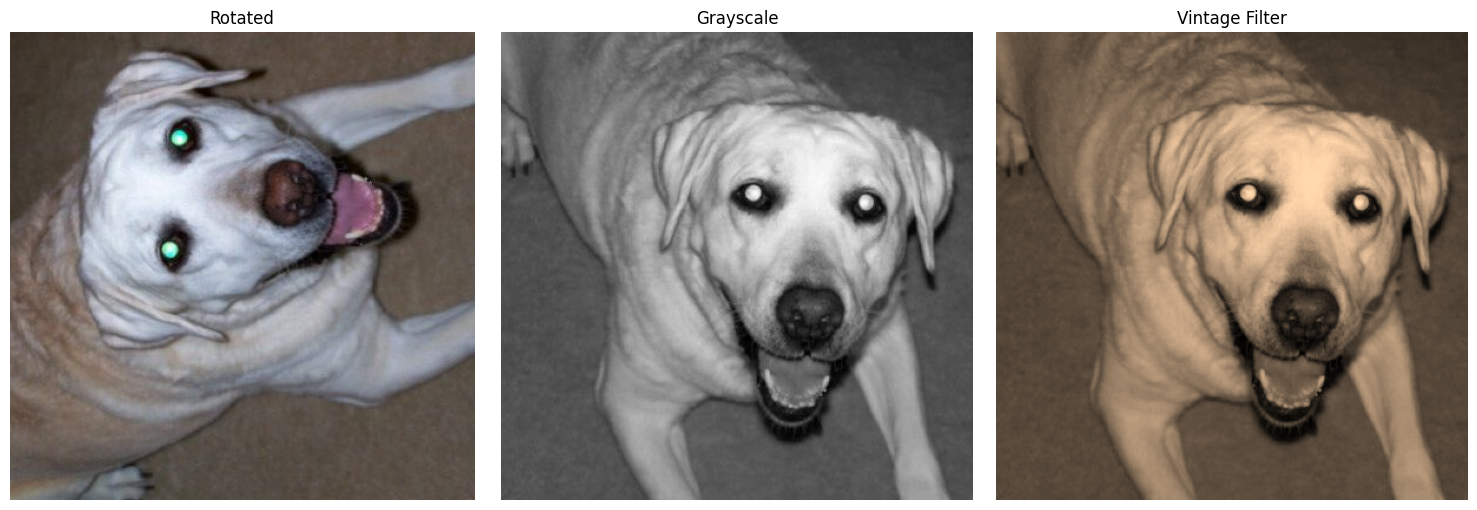

In [27]:
# Load dog image
dog = np.array(Image.open('353.jpg'))

# Rotate
dog_rotated = np.rot90(dog)

# Grayscale
dog_gray = (
    0.299 * dog[:, :, 0] +
    0.587 * dog[:, :, 1] +
    0.114 * dog[:, :, 2]
)

# Sepia
dog_sepia = np.zeros_like(dog, dtype=float)
dog_sepia[:, :, 0] = dog_gray * 1.2
dog_sepia[:, :, 1] = dog_gray * 1.0
dog_sepia[:, :, 2] = dog_gray * 0.8
dog_sepia = np.clip(dog_sepia * 0.9, 0, 255).astype(np.uint8)

# Display
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(dog_rotated)
axes[0].set_title('Rotated')
axes[0].axis('off')

axes[1].imshow(dog_gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

axes[2].imshow(dog_sepia)
axes[2].set_title('Vintage Filter')
axes[2].axis('off')

plt.tight_layout()
plt.show()

---

## Lab 01 – Notebook 03 Cheat Sheet
### Working with Images (NumPy, PIL, OpenCV)

---

### Core Mental Model

| Concept | Description |
|---------|-------------|
| Image = Array | An image is just a NumPy array |
| Shape | `(height, width, 3)` for RGB |
| Pixel | `[Red, Green, Blue]` values |
| Range | 0–255 for `uint8` |

---

### Loading Images

```python
# PIL (loads as RGB)
from PIL import Image
img = np.array(Image.open('image.png'))

# OpenCV (loads as BGR — convert!)
import cv2
img_bgr = cv2.imread('image.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
```

---

### Displaying Images

```python
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()
```

---

### Image Properties

```python
img.shape          # (height, width, channels)
img.dtype          # usually uint8
img.min(), img.max()
img.size           # total elements
height * width     # number of pixels
```

---

### Accessing Pixels & Channels

```python
img[y, x]          # Pixel at (y, x) → [R, G, B]
img[:, :, 0]       # Red channel
img[:, :, 1]       # Green channel
img[:, :, 2]       # Blue channel
```

---

### Normalisation (ML-Critical)

```python
# Convert [0, 255] → [0, 1]
img_01 = img / 255.0
```

> Matplotlib auto-scales for display — ML models do **not**.

---

### Common Transformations

| Operation | Code |
|-----------|------|
| Rotate 90° | `np.rot90(img)` |
| Flip horizontal | `np.fliplr(img)` |
| Flip vertical | `np.flipud(img)` |
| Brighten | `np.clip(img * 1.5, 0, 255).astype(np.uint8)` |
| Darken | `(img * 0.5).astype(np.uint8)` |
| Invert | `255 - img` |

---

### Grayscale Conversion

```python
gray = (
    0.299 * img[:, :, 0] +
    0.587 * img[:, :, 1] +
    0.114 * img[:, :, 2]
)
```

---

### Combining Channels

```python
combined = np.stack((red, green, blue), axis=2)
```

---

### Key Takeaways

- Images are arrays with meaning
- Most preprocessing = NumPy arithmetic
- Normalisation is **required** for ML models
- Channel manipulation changes colour, not structure
- These steps are foundational for CNNs and vision models